In [4]:
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [5]:
def toInt(a):
    return [int(x) for x in a]

In [211]:
def hist(a):
    k = round(1 + math.log(a.size, 2))
    delta =  int(((a[-1] - a[0]) + k - (a[-1] - a[0]) % k)/k)
    segments = []
    for i in [a[0] + j * delta for  j in range(k)]:
        segments.append(i)
    segments.append(a[0] + k * delta)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig('test2png.png', dpi=100)
    
    hist, bins= np.histogram(a, bins = segments)
    center = (bins[:-1] + bins[1:]) / 2
    width = bins[0] - bins[1]
    hist = [x / delta/a.size for x in hist]
    plt.bar(center, hist, align='center', width=width, color = 'lightblue' ,edgecolor = 'black')
    plt.xlim(segments[0] - 1, segments[-1] + 1)
    plt.grid(True)
    plt.xticks(segments)
    
    plt.show()

In [212]:
def bootStrap(a):
    alpha = []
    for i in range(1000):
        al = 0
        for j in range(a.size):
            al += a[rnd.randint(0, a.size - 1)]
        alpha.append(al / a.size)
    hist(np.sort(np.array(alpha)))

In [213]:
def median(a):
    x = 0;
    for i in a:
        x += i
    return x / a.size

In [214]:
def reach(a):
    b = a[-1] - a[0]
    return b

In [215]:
def mode(a):
    d = {}
    for i in a:
        if(d.get(i) == None):
            d[i] = 1
        else:
            d[i] = d[i] + 1
    max = d[a[0]]
    for i in d.values():
        if(max < i):
            max = i
    answ = []
    for i in d.items():
        if(i[1] == max):
            answ.append(i[0])
    return answ

In [285]:
def eDistribution(a):
    newData = []
    for i in a:
        k = 0;
        for j in range(a.size):
            k += 1 if a[j] < i else 0
        newData.append(k/a.size)
    
    width = []
    for i in range(len(a) - 1):
        width.append(a[i + 1] - a[i])
    width.append(0.8)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig('test2png.png', dpi=100)
    plt.bar(a, newData, align='edge', width = width, color = 'lightblue')
    plt.xlim(a[0] - 0.1, a[-1] + 0.3 )
    plt.grid(True)
    plt.show()
    
    return "Эмпирическая фнунция распределения - F(y) = (1/" + str(a.size) + ") * sum(i = 1, " + str(a.size) + ")(I(X[i] < y))"

In [292]:
def kernelEstimation(a):
    mid = 0;
    for i in a:
        mid += i
    mid /= a.size
    G = 0
    for i in a:
        G += (i - mid)*(i - mid)
    G *= 1 / (a.size - 1)
    G = math.sqrt(G)
    h = 1.06 * G / math.pow(a.size , 0.2)
    x = []
    y = []
    rr = np.linspace(a[0] - (a[-1] - a[0]) * 0.1, a[-1] + (a[-1] - a[0]) * 0.1, a.size * 200)
    for i in rr:
        x.append(i)
        tmp = 0
        for j in a:
            z = (i - j)/h
            if (abs(z) <= 1):
                tmp += (3/4)*(1 - z*z)
            else:
                tmp += 0
        tmp *= (1/(a.size * h))
        y.append(tmp)

    plt.plot(x, y)
    plt.show()

[0.27124427 0.99263667 0.33532622 1.31757341 1.64900647 1.58920772
 0.60732481 0.40219415 1.25121058 0.11134019 1.10033214 0.20986059
 1.21855046 0.34480844 0.01158209 0.91531114 2.31188134 1.70080552
 0.21955695 0.72822082 0.33329763 0.4354261  0.40384391 3.3270367
 1.32467728]


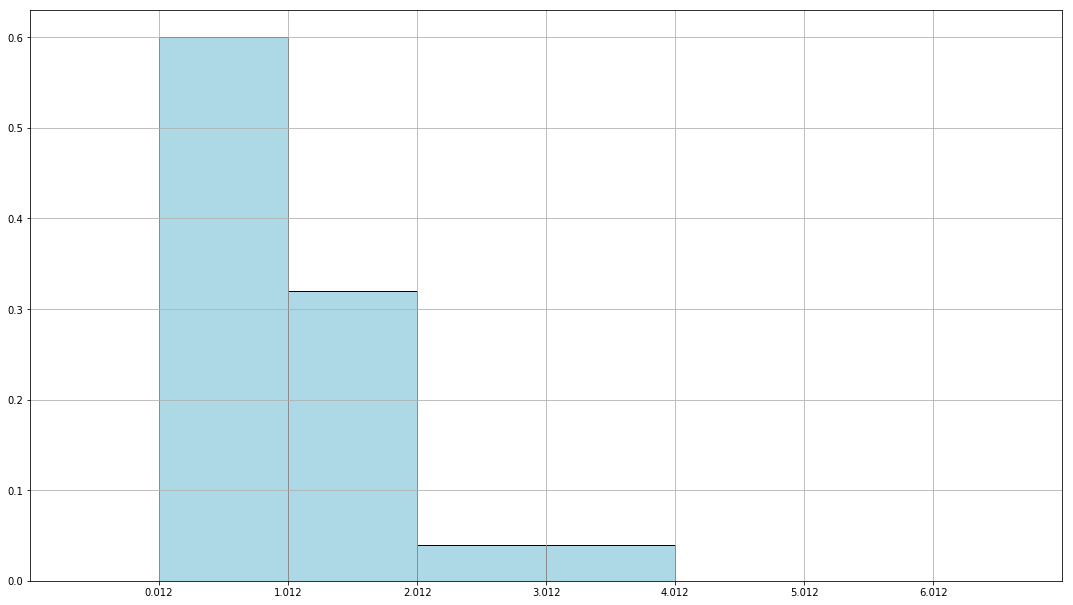

In [321]:
exp = np.array([])
for i in range (25):
    exp = np.append(exp, rnd.expovariate(1))
#exp = np.array([21, 28, 2, 10, 25, 19, 6, 13, 8, 12])
print(exp)
hist(np.sort(exp))

In [322]:
print("-------------------------------------------------------------------")
print("Моды : ")
print(mode(exp))
print("-------------------------------------------------------------------")
print("Медиана - ", median(exp))
print("Размах - ", reach(np.sort(exp)))
print("Кэффициент ассиметрии - ", 5)

-------------------------------------------------------------------
Моды : 
[0.27124426835943255, 0.9926366672050005, 0.3353262185254532, 1.3175734071864686, 1.649006468748032, 1.5892077151477615, 0.607324805861471, 0.40219414958994587, 1.251210578036424, 0.11134019181820463, 1.1003321446128473, 0.2098605863801857, 1.2185504559422455, 0.34480843730448046, 0.011582088100769343, 0.9153111430893007, 2.3118813429940777, 1.7008055195857, 0.2195569472119962, 0.7282208229747206, 0.33329762870469554, 0.4354261008007637, 0.40384390712097645, 3.3270366975899304, 1.324677276765188]
-------------------------------------------------------------------
Медиана -  0.9244902227862428
Размах -  3.315454609489161
Кэффициент ассиметрии -  5


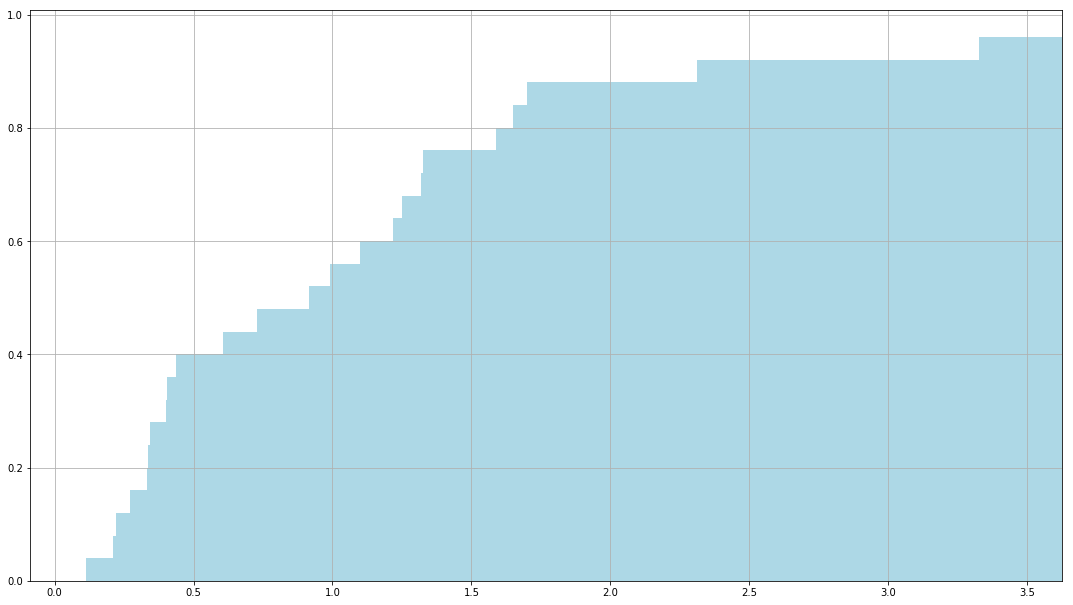

Эмпирическая фнунция распределения - F(y) = (1/25) * sum(i = 1, 25)(I(X[i] < y))


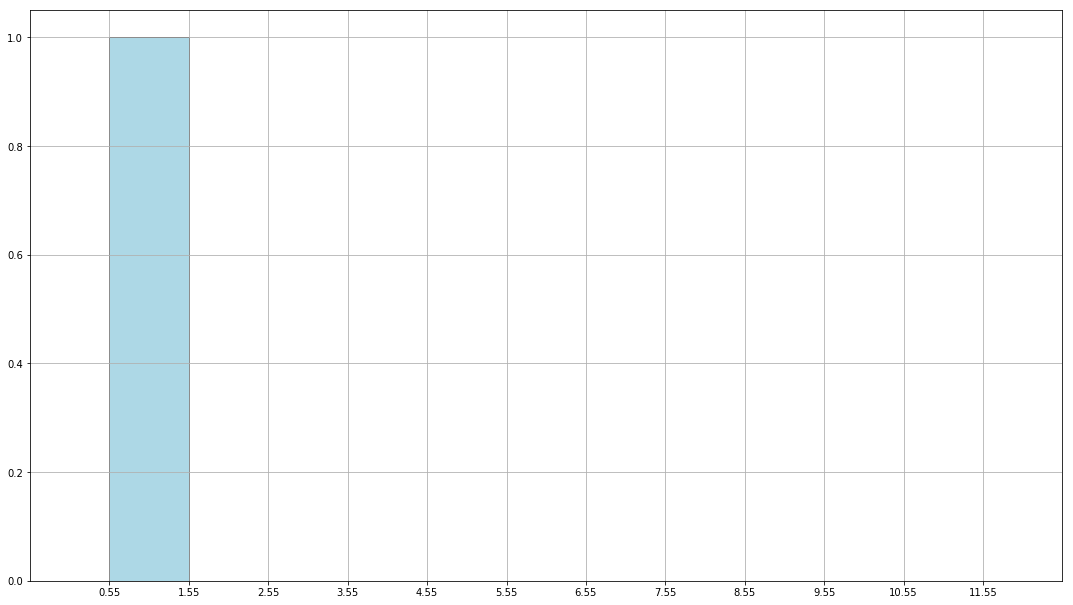

In [323]:
print(eDistribution(np.sort(exp)))
bootStrap(np.sort(exp))

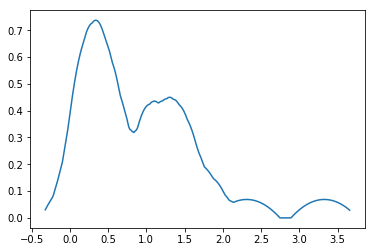

In [324]:
kernelEstimation(np.sort(exp))